In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'
path_user_profiles_KMEANS = './data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = './data/User_Profiles_hierarchical_clusterized.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [5]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [6]:
df_profiles.sample()

danceability   energy       key  \
c6a6ba78c6b6a5aa2f3a1c689c634eec5c9248c1      0.539233  0.66391  0.393659   

                                          loudness      mode  speechiness  \
c6a6ba78c6b6a5aa2f3a1c689c634eec5c9248c1  0.803606  0.608025     0.065909   

                                          acousticness  instrumentalness  \
c6a6ba78c6b6a5aa2f3a1c689c634eec5c9248c1      0.258062          0.261859   

                                          liveness  valence     tempo  \
c6a6ba78c6b6a5aa2f3a1c689c634eec5c9248c1  0.216807  0.47066  0.538053   

                                          time_signature  
c6a6ba78c6b6a5aa2f3a1c689c634eec5c9248c1        0.776543

додамо до датафрейму користувачів дані про їх кластер

In [7]:
df_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')

In [8]:
df_profiles['cluster_kmeans'] = df_kmeans['cluster_k_5']

In [9]:
df_users = df_users.merge(df_kmeans[['cluster_k_5']], left_on='user_id', right_index=True, how='inner')

In [10]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'cluster_kmeans']

In [11]:
df_hier = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')

In [12]:
df_profiles['cluster_hierarchical'] = df_hier['cluster']

In [13]:
df_users = df_users.merge(df_hier[['cluster']], left_on='user_id', right_index=True, how='inner')

In [14]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'cluster_kmeans',
       'cluster_hierarchical']

In [15]:
df_profiles.sample()

danceability   energy       key  \
cbd74532fd44d24ec809edd6e10901556227d4f0      0.386363  0.83546  0.531274   

                                          loudness      mode  speechiness  \
cbd74532fd44d24ec809edd6e10901556227d4f0  0.841107  0.497863     0.078861   

                                          acousticness  instrumentalness  \
cbd74532fd44d24ec809edd6e10901556227d4f0      0.059478          0.401446   

                                          liveness   valence     tempo  \
cbd74532fd44d24ec809edd6e10901556227d4f0  0.201667  0.384728  0.534798   

                                          time_signature  cluster_kmeans  \
cbd74532fd44d24ec809edd6e10901556227d4f0         0.77735               2   

                                          cluster_hierarchical  
cbd74532fd44d24ec809edd6e10901556227d4f0                     3

In [16]:
df_profiles['cluster_kmeans'].unique(), df_profiles['cluster_hierarchical'].unique()

(array([2, 3, 1, 4, 0], dtype=int64), array([1, 2, 0, 3], dtype=int64))

## **Створення матриць користувач-трек для кластерів kmeans**

In [33]:
path_cluster_man_zero = './data/filled_clustered/filled_manhattan_zero.csv'
path_cluster_man_one = './data/filled_clustered/filled_manhattan_one.csv'
path_cluster_man_two = './data/filled_clustered/filled_manhattan_two.csv'
path_cluster_man_three = './data/filled_clustered/filled_manhattan_three.csv'
path_cluster_man_four = './data/filled_clustered/filled_manhattan_four.csv'

In [35]:
user_track_matrix_kmeans_zero = pd.read_csv(path_cluster_man_zero, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_one = pd.read_csv(path_cluster_man_one, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_two = pd.read_csv(path_cluster_man_two, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_three = pd.read_csv(path_cluster_man_three, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_four = pd.read_csv(path_cluster_man_four, on_bad_lines='skip', index_col='user_id')

user_track_matrix_kmeans_zero.columns.name = 'track_id'
user_track_matrix_kmeans_one.columns.name = 'track_id'
user_track_matrix_kmeans_two.columns.name = 'track_id'
user_track_matrix_kmeans_three.columns.name = 'track_id'
user_track_matrix_kmeans_four.columns.name = 'track_id'

clusters_manhattan = {
    0: user_track_matrix_kmeans_zero,
    1: user_track_matrix_kmeans_one,
    2: user_track_matrix_kmeans_two,
    3: user_track_matrix_kmeans_three,
    4: user_track_matrix_kmeans_four
}

In [34]:
path_cluster_cos_zero = './data/filled_clustered/filled_kmeans_zero.csv'
path_cluster_cos_one = './data/filled_clustered/filled_kmeans_one.csv'
path_cluster_cos_two = './data/filled_clustered/filled_kmeans_two.csv'
path_cluster_cos_three = './data/filled_clustered/filled_kmeans_three.csv'
path_cluster_cos_four = './data/filled_clustered/filled_kmeans_four.csv'

In [36]:
user_track_matrix_kmeans_zero = pd.read_csv(path_cluster_cos_zero, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_one = pd.read_csv(path_cluster_cos_one, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_two = pd.read_csv(path_cluster_cos_two, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_three = pd.read_csv(path_cluster_cos_three, on_bad_lines='skip', index_col='user_id')
user_track_matrix_kmeans_four = pd.read_csv(path_cluster_cos_four, on_bad_lines='skip', index_col='user_id')

user_track_matrix_kmeans_zero.columns.name = 'track_id'
user_track_matrix_kmeans_one.columns.name = 'track_id'
user_track_matrix_kmeans_two.columns.name = 'track_id'
user_track_matrix_kmeans_three.columns.name = 'track_id'
user_track_matrix_kmeans_four.columns.name = 'track_id'

clusters_cosine = {
    0: user_track_matrix_kmeans_zero,
    1: user_track_matrix_kmeans_one,
    2: user_track_matrix_kmeans_two,
    3: user_track_matrix_kmeans_three,
    4: user_track_matrix_kmeans_four
}

# **Отримання рекомендацій**

In [82]:
def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit):
    filtered_user_df = user_df[user_df['user_id'] == user_id]
    listened_tracks = filtered_user_df['track_id'].values

    user_matrix = user_track_matrix[user_track_matrix.index == user_id]
    not_zero_ratings = user_matrix.loc[:, (user_matrix != 0).all()]

    recommended_tracks = set(listened_tracks).symmetric_difference(not_zero_ratings.columns)
    filtered_user_row = not_zero_ratings[list(recommended_tracks)]
    top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].sort_values(ascending=False).head(limit).index]
    return top_recommendations

In [38]:
def get_features_of_recommended_tracks(recs, df_features):
    result = df_features.merge(recs.transpose(), on='track_id', how='inner')
    result.rename(columns={recs.index.values[0]: 'similarity'}, inplace=True)
    return result

In [41]:
ransom_user = df_users[df_users['cluster_kmeans'] == 3].sample()['user_id'].values[0]

res_man_matrix = get_user_to_user_recommendations(clusters_manhattan[3], df_users, ransom_user, 20)
recommendations_manhattan = get_features_of_recommended_tracks(res_man_matrix, df_features)

res_cos_matrix = get_user_to_user_recommendations(clusters_cosine[3], df_users, ransom_user, 20)
recommendations_cosine = get_features_of_recommended_tracks(res_cos_matrix, df_features)

In [42]:
ransom_user

'a6a472276e0baecfa4554a7b47068dc9db65a3d4'

# **Візуалізація рекомендованих треків на основі їхніх характеристик**

In [43]:
def plot_user_recommendation(users: pd.DataFrame, features: list, user_profile: pd.DataFrame = None):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])

    values_up = ''
    if user_profile is not None and not user_profile.empty:
        values_up = user_profile[features].values
        values_up = np.append(values_up[0], values_up[0][0])


    rows = (users.shape[0] + 4) // 5
    fig, axs = plt.subplots(rows, 5, figsize=(25, 10 * (rows // 2)), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Recommendations', fontsize=16, fontweight='bold')

    for i, (index, user) in enumerate(users.iterrows()):
        row = i // 5
        col = i % 5

        values = user[features].values
        values = np.append(values, values[0])

        ax = axs[row, col]
        ax.fill(angles, values, color='maroon', alpha=0.25)
        ax.plot(angles, values, color='maroon', linewidth=2)

        if user_profile is not None and not user_profile.empty:
            ax.fill(angles, values_up, color='crimson', alpha=0.25)
            ax.plot(angles, values_up, color='crimson', linewidth=2)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features, fontsize=8)
        ax.set_yticklabels([])
        ax.set_title(user['name'], size='medium', fontweight='bold')

    plt.show()

In [134]:
def plot_one_user_recommendation(user: pd.DataFrame, features: list):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0]) 

    values = user[features].iloc[0].values
    values = np.append(values, values[0])

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Taste', fontsize=16, fontweight='bold')

    ax.fill(angles, values, color='maroon', alpha=0.25)
    ax.plot(angles, values, color='maroon', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=8)
    ax.set_yticklabels([])

    if 'name' in user.columns:
        ax.set_title(user['name'].iloc[0], size='medium', fontweight='bold')

    plt.show()

### **Візуалізація смаку**

In [45]:
recommendations_cosine.shape, recommendations_manhattan.shape

((20, 19), (20, 19))

In [46]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

In [47]:
most_listened = df_users[df_users['user_id'] == ransom_user].sort_values(by='playcount', ascending=False)[20:]

In [48]:
most_listened = most_listened.merge(df_features, on='track_id', how='inner').iloc[:20]

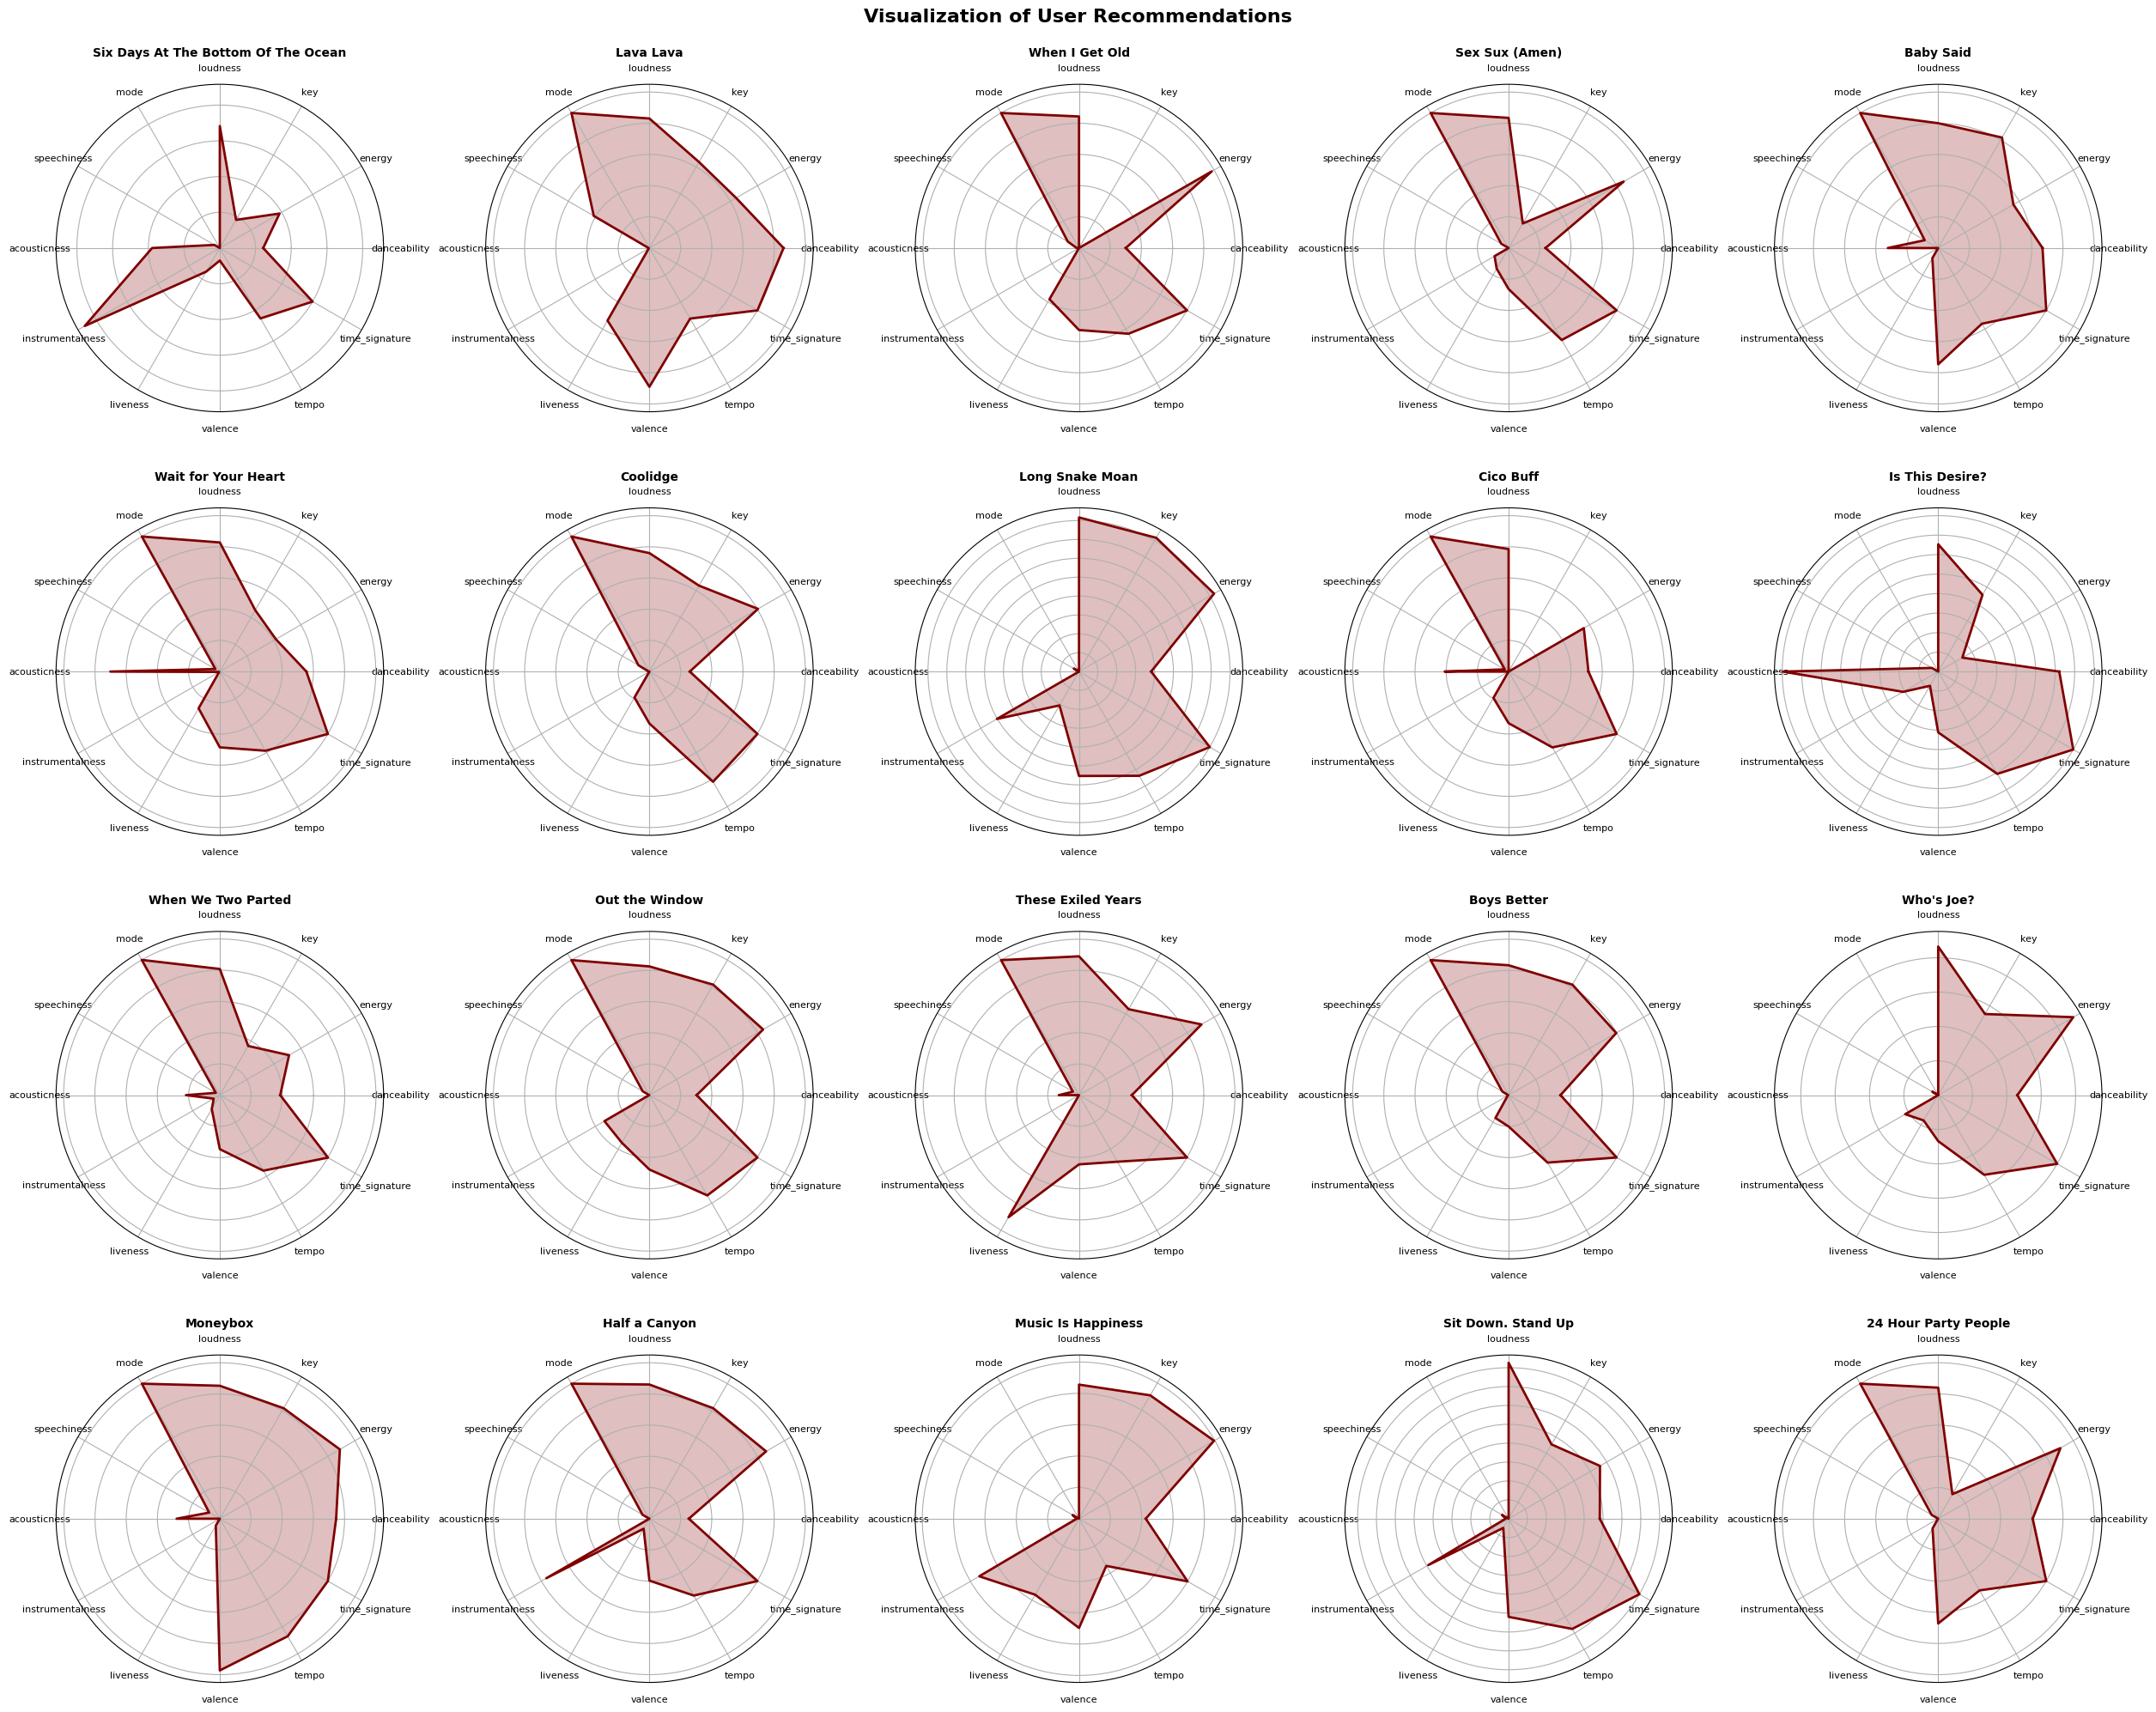

In [49]:
plot_user_recommendation(users=most_listened, features=features)

### **Візуалізація рекомендацій**

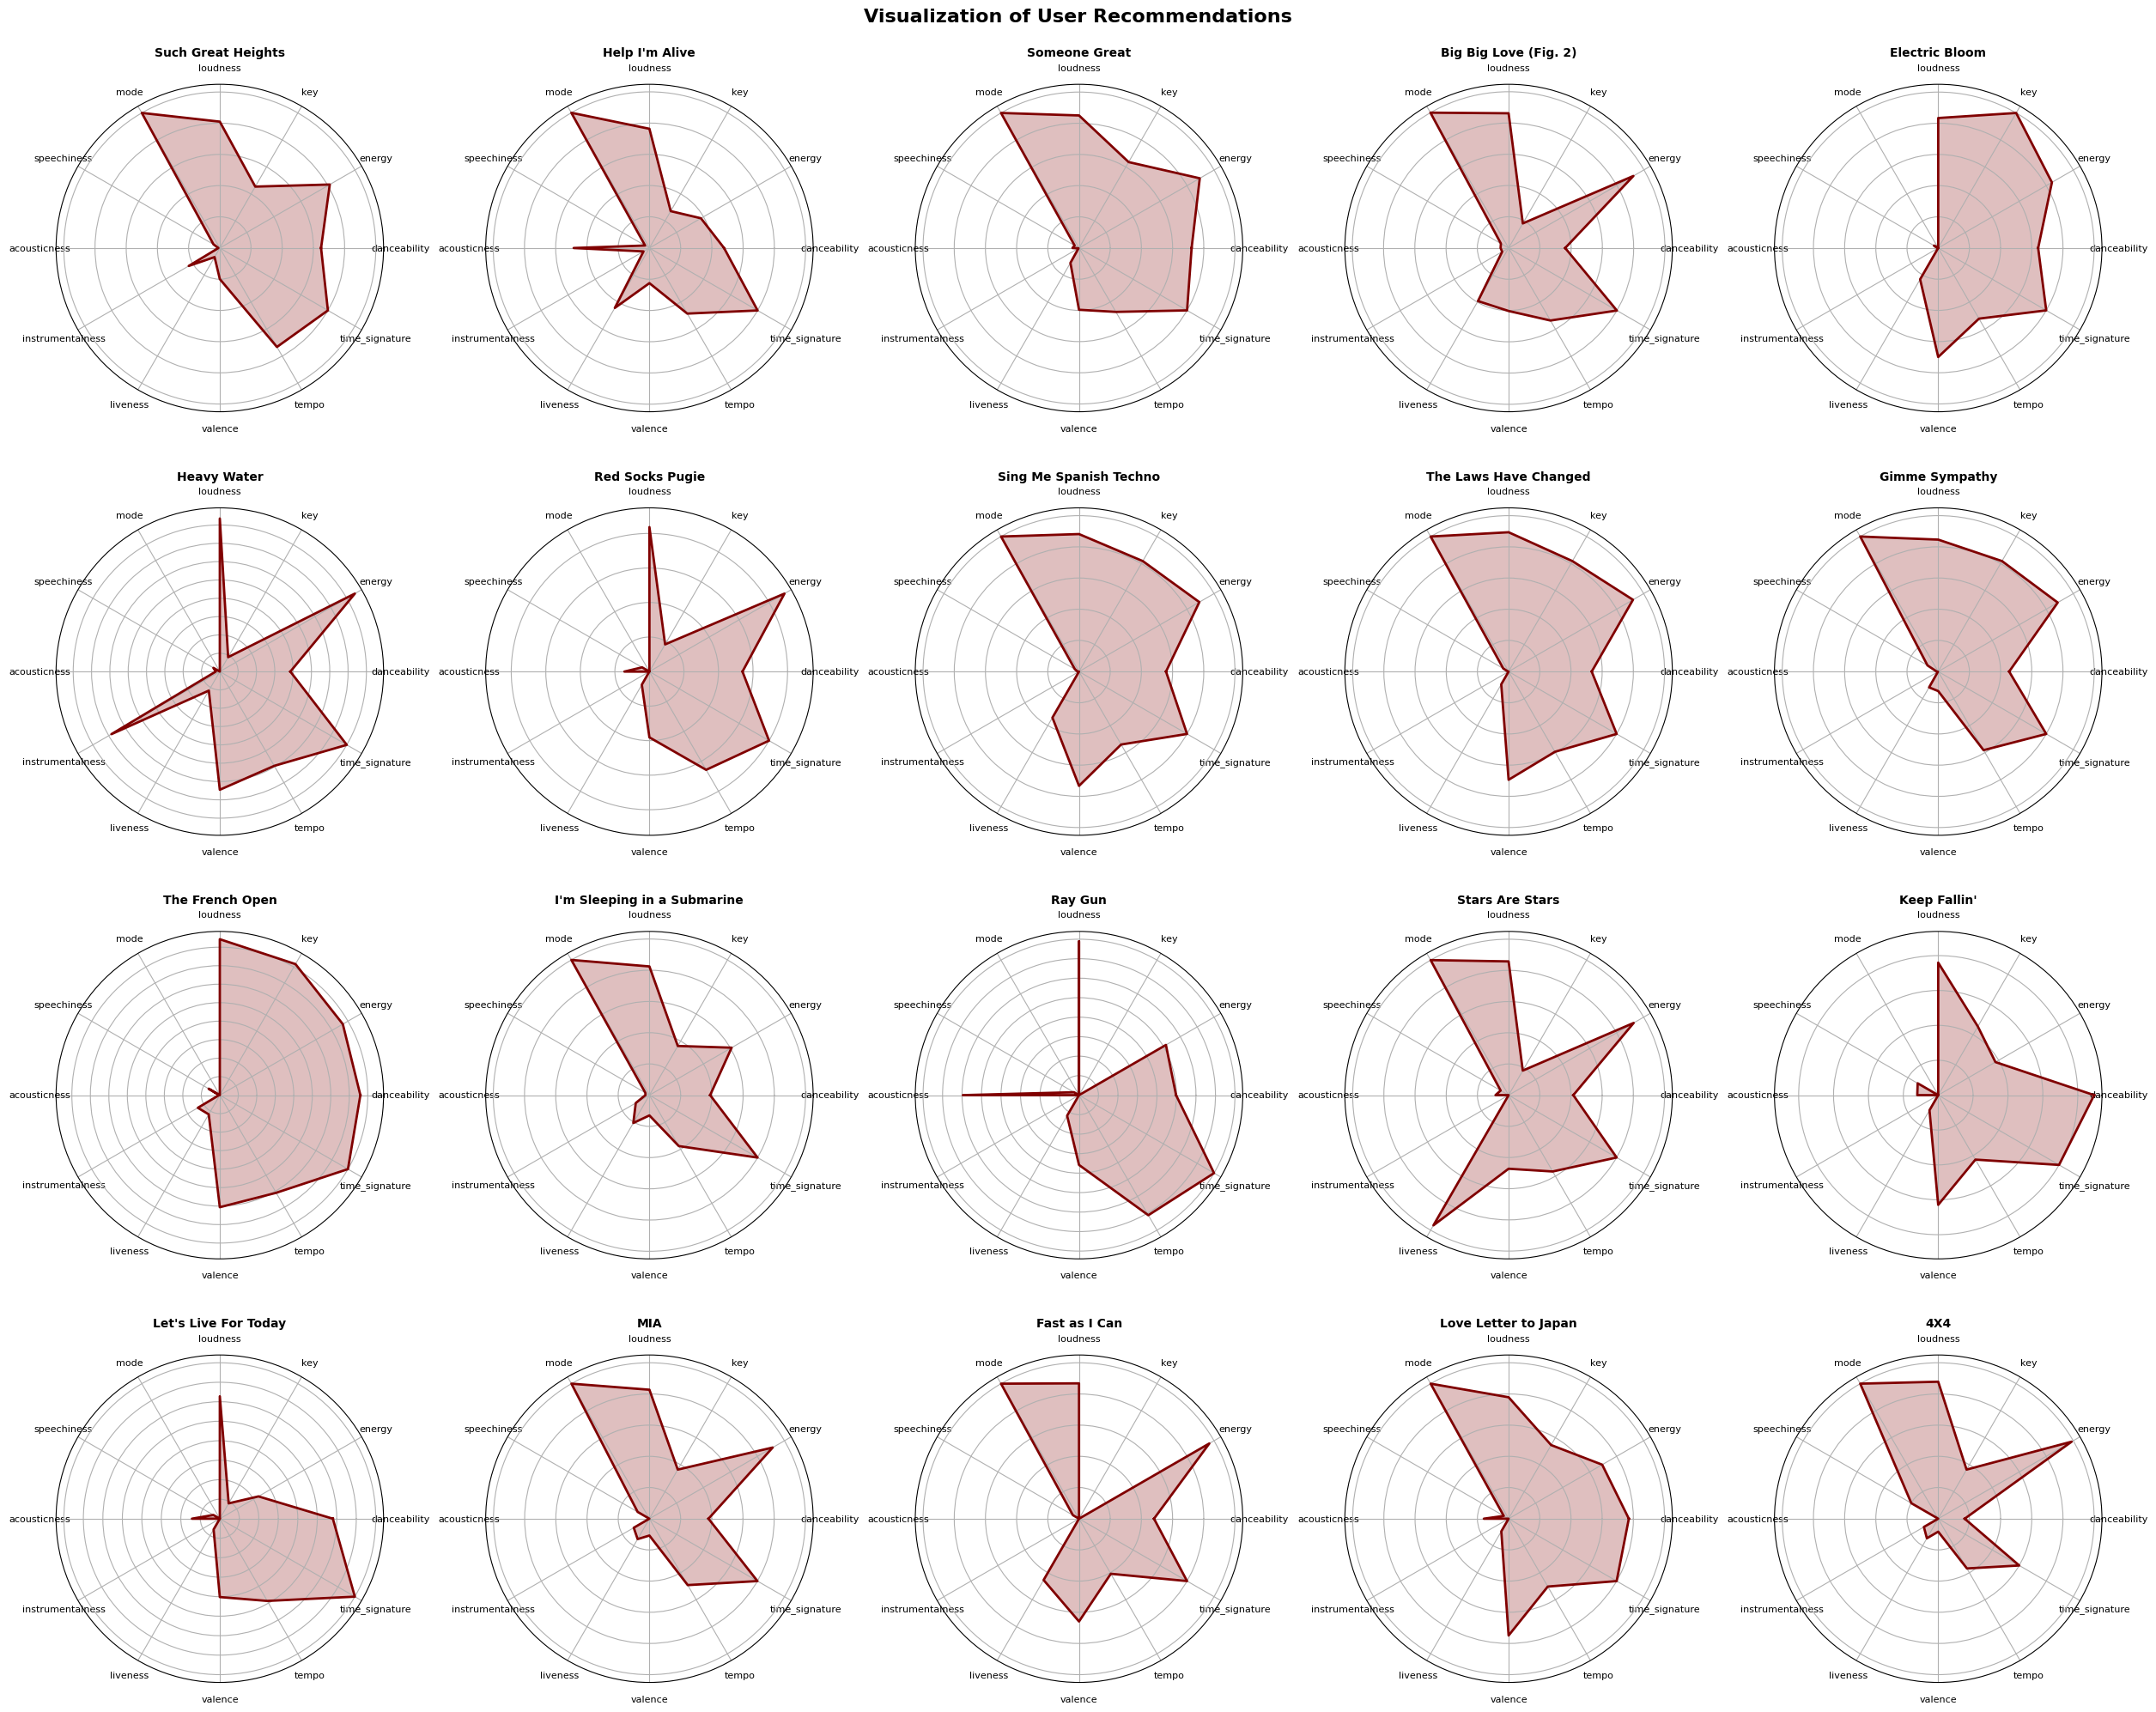

In [51]:
plot_user_recommendation(recommendations_cosine, features=features)

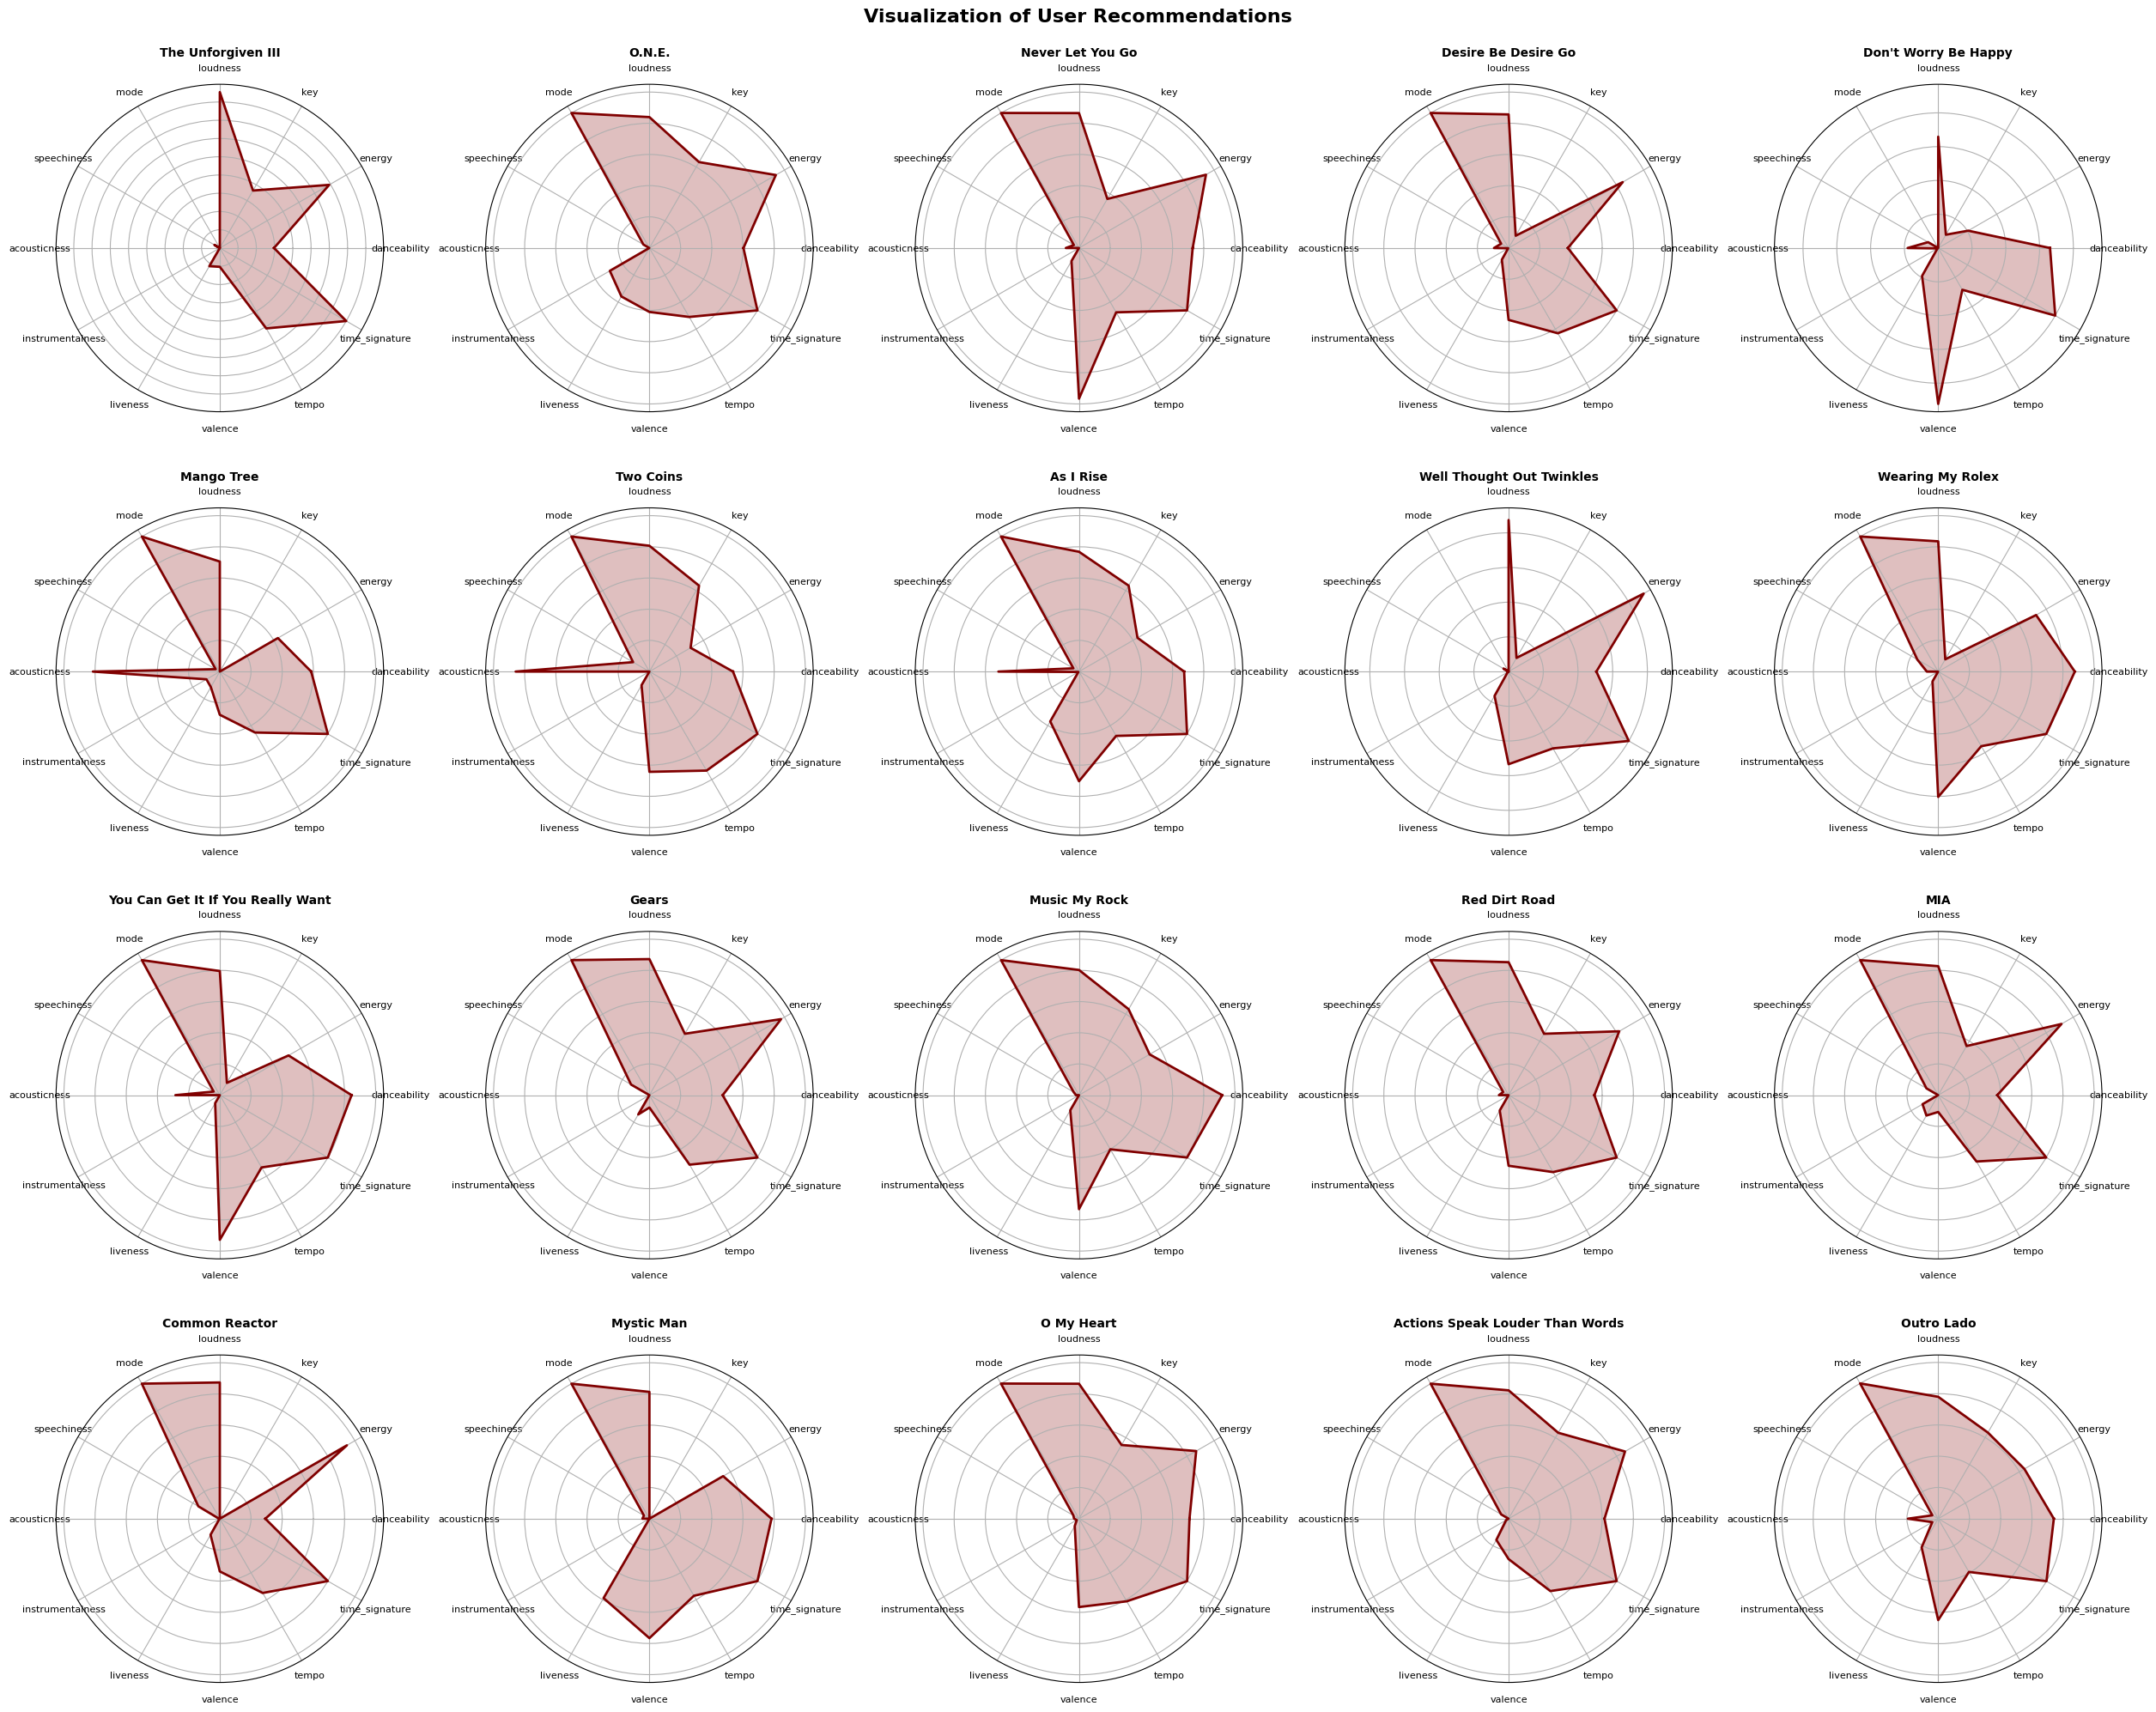

In [52]:
plot_user_recommendation(recommendations_manhattan, features=features)

# **Відображення профілю цього користувача для порівняння**

In [53]:
user_profile = df_profiles[df_profiles.index == ransom_user]

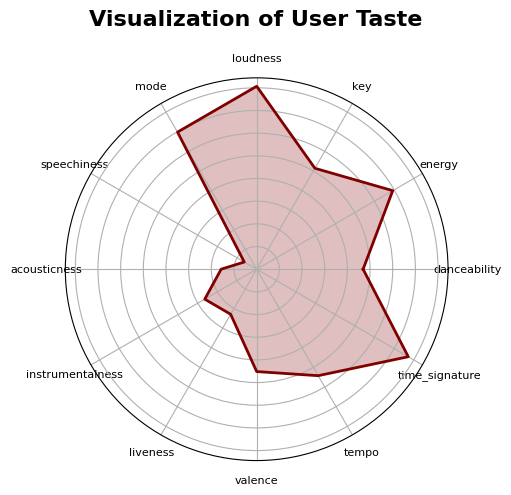

In [54]:
plot_one_user_recommendation(user=df_profiles[df_profiles.index == ransom_user], features=features)

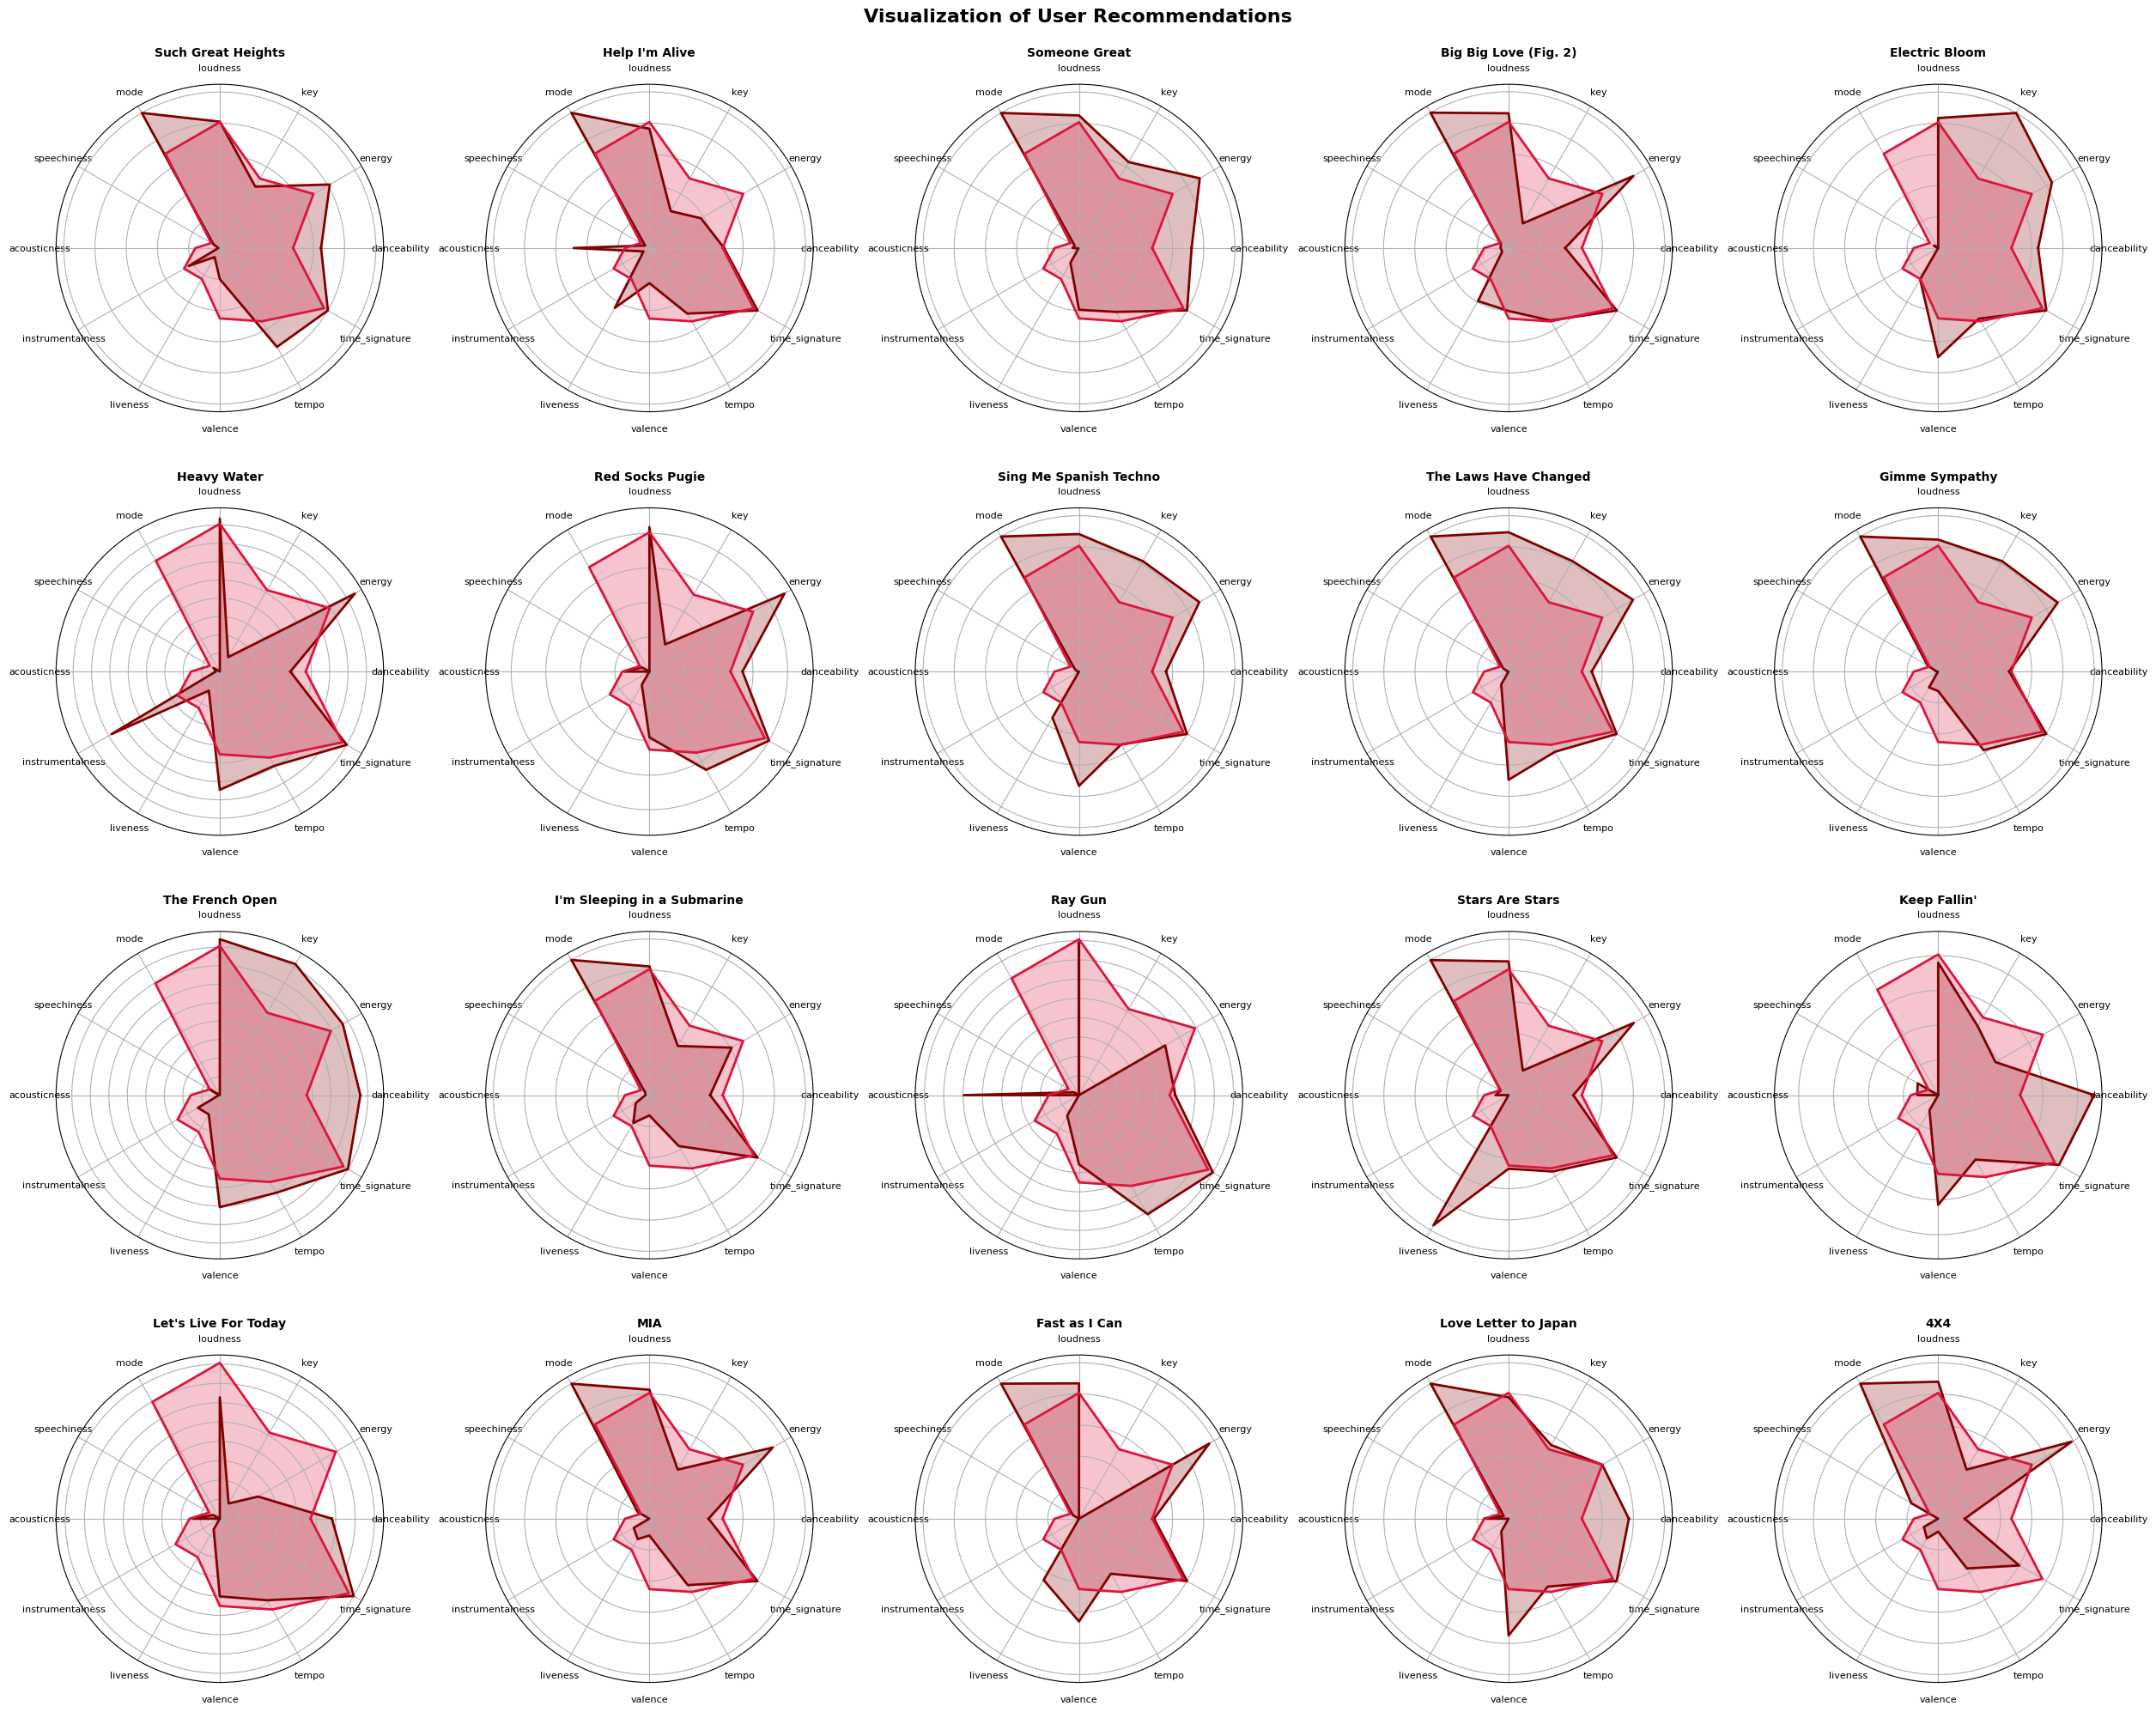

In [55]:
plot_user_recommendation(users=recommendations_cosine, features=features, user_profile=df_profiles[df_profiles.index == ransom_user])

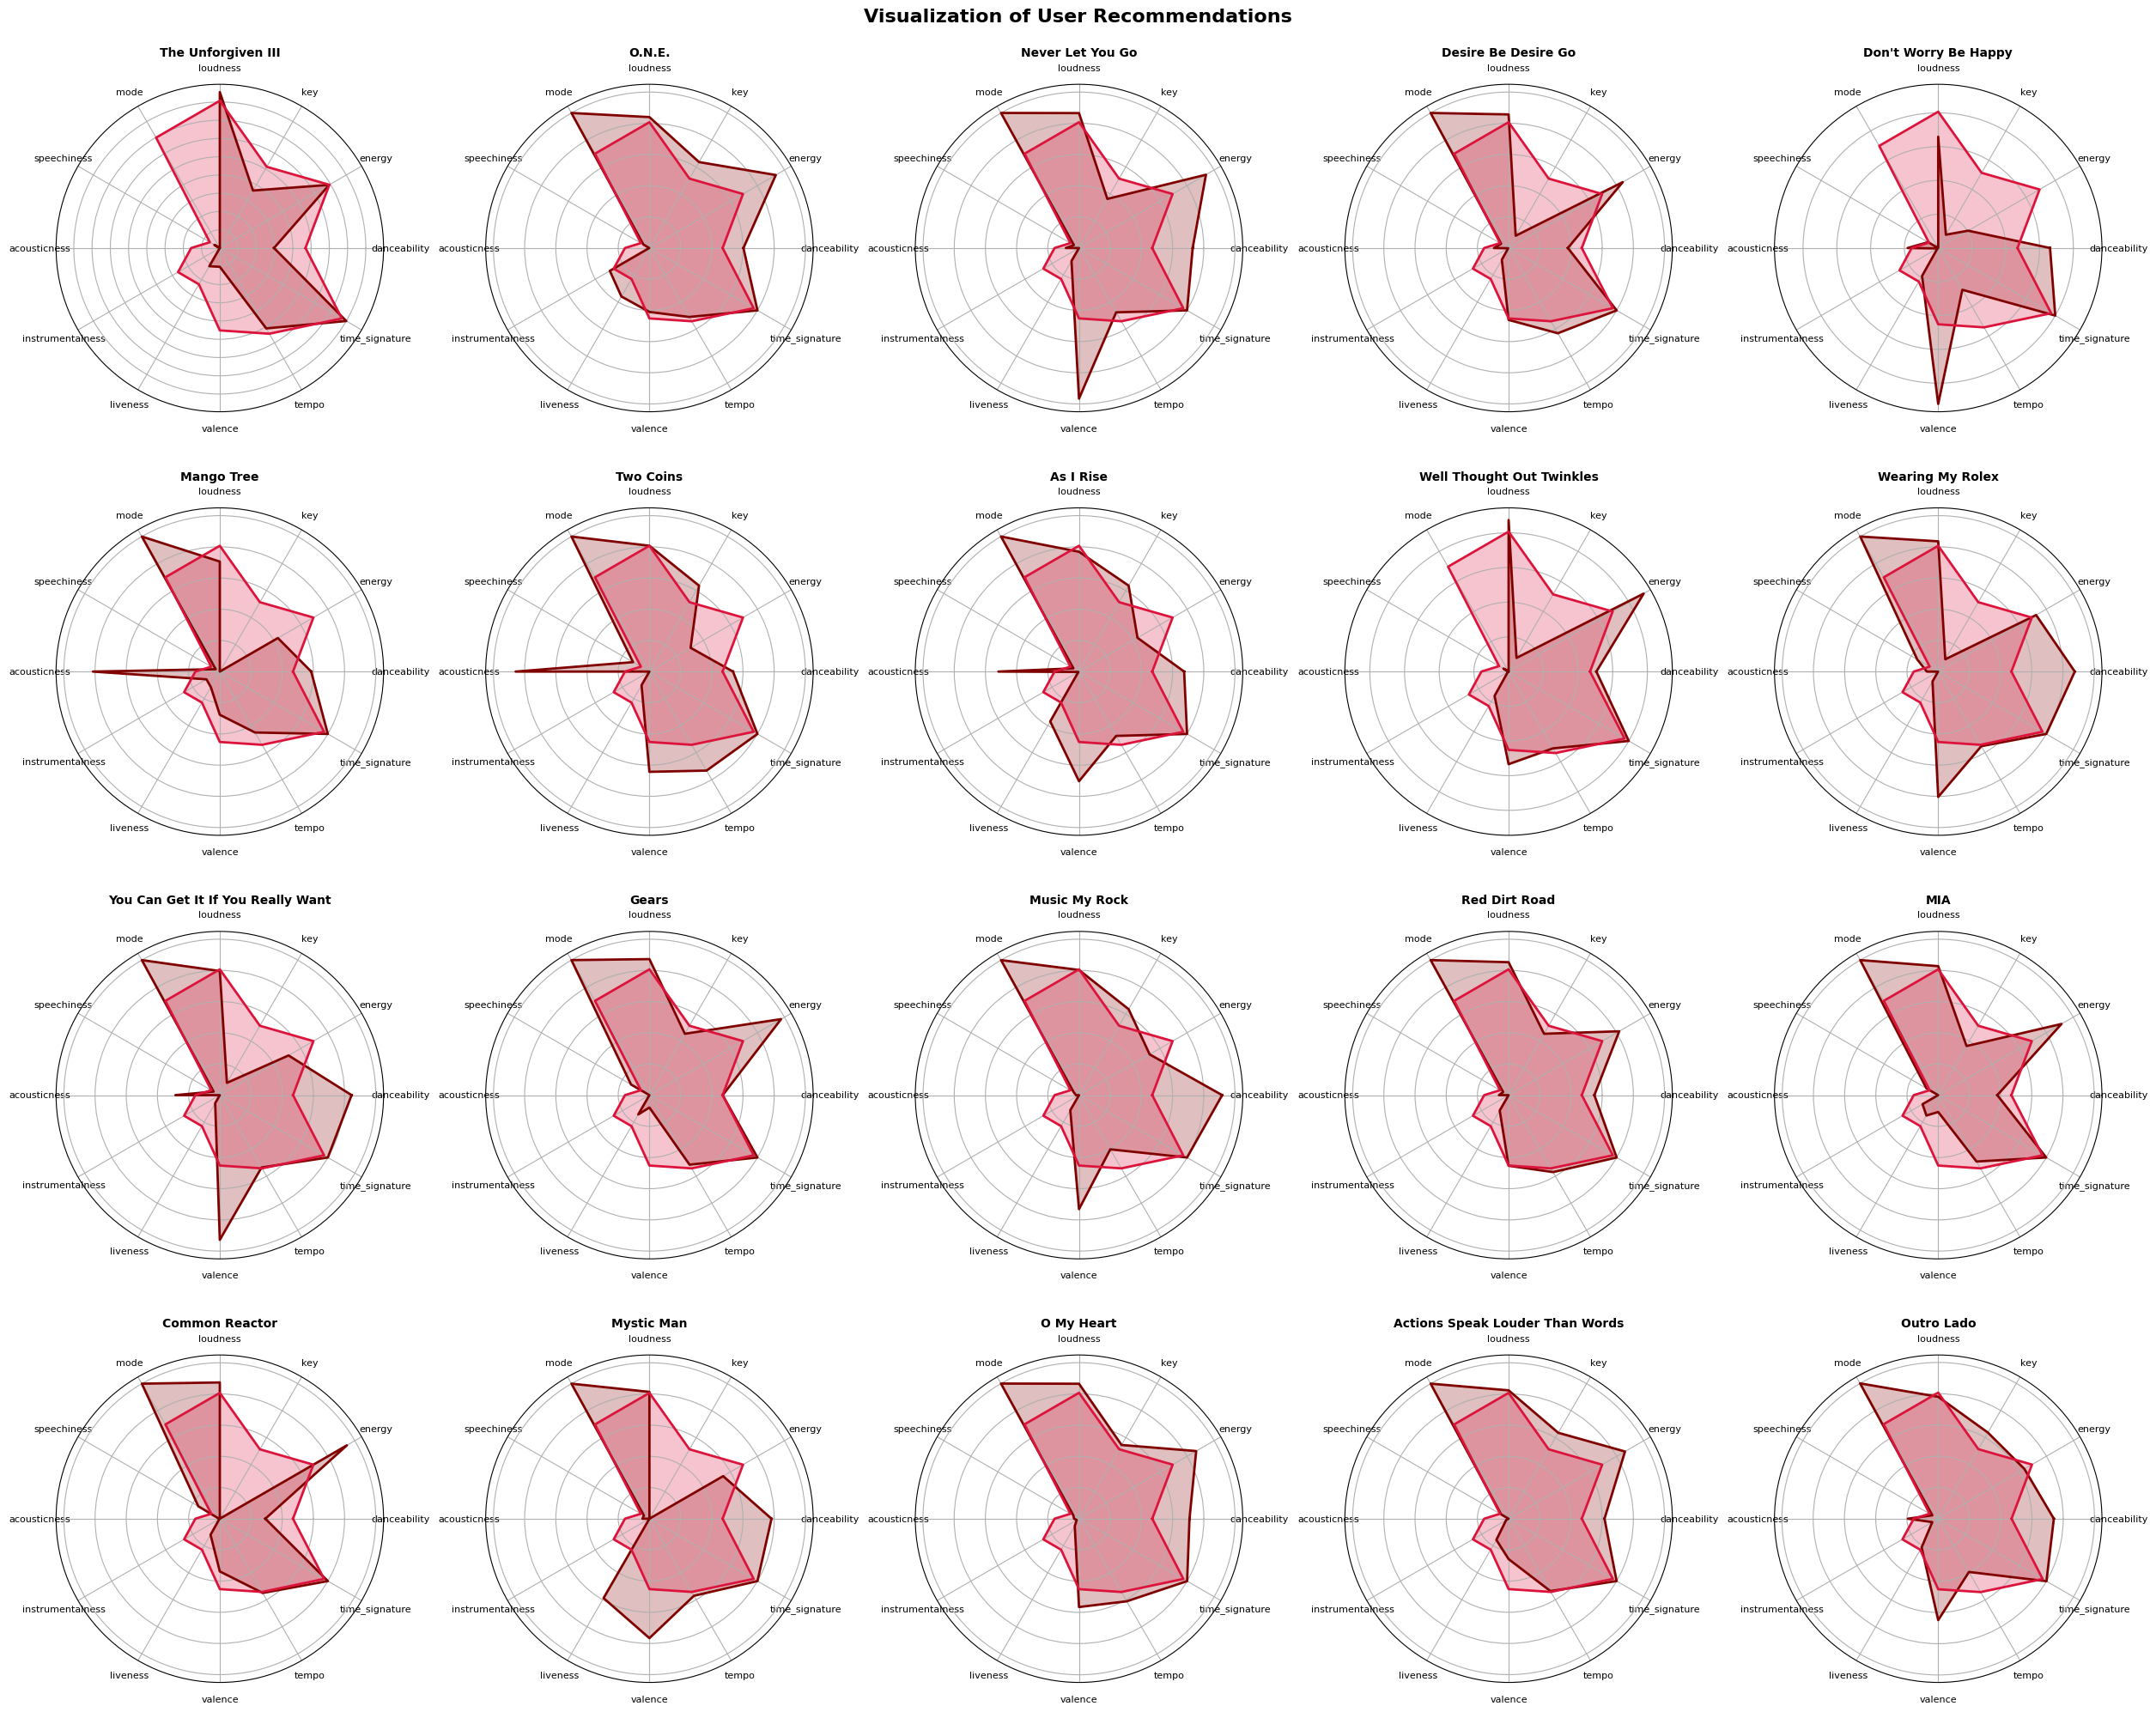

In [56]:
plot_user_recommendation(users=recommendations_manhattan, features=features, user_profile=df_profiles[df_profiles.index == ransom_user])

# **Вимірювання точності (порівняння рекомендацій з профілем користувача)**

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [58]:
def simmilarity(user_profile, list_of_recs, features):
  recs = []
  df = list_of_recs[features]
  for col in df.columns:
    median = df[col].median()
    recs.append(median)
  return {
      'mae': mean_absolute_error(y_true=user_profile[features].T.values, y_pred=recs),
      'mse': mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs),
      'rmse': root_mean_squared_error(y_true=user_profile[features].T.values, y_pred=recs)
  }

In [59]:
cosine = simmilarity(user_profile, recommendations_cosine, features)
cosine

{'mae': 0.10976544821958596,
 'mse': 0.020811078763875373,
 'rmse': 0.14426045460858417}

In [60]:
manhattan = simmilarity(user_profile, recommendations_manhattan, features)
manhattan

{'mae': 0.11225705544630944,
 'mse': 0.020282415610774648,
 'rmse': 0.1424163460097704}

In [62]:
comparisson = {
    'mae': cosine['mae'] - manhattan['mae'],
    'mse': cosine['mse'] - manhattan['mse'],
    'rmse': cosine['rmse'] - manhattan['rmse']
}

comparisson

{'mae': -0.00249160722672348,
 'mse': 0.0005286631531007252,
 'rmse': 0.0018441085988137595}

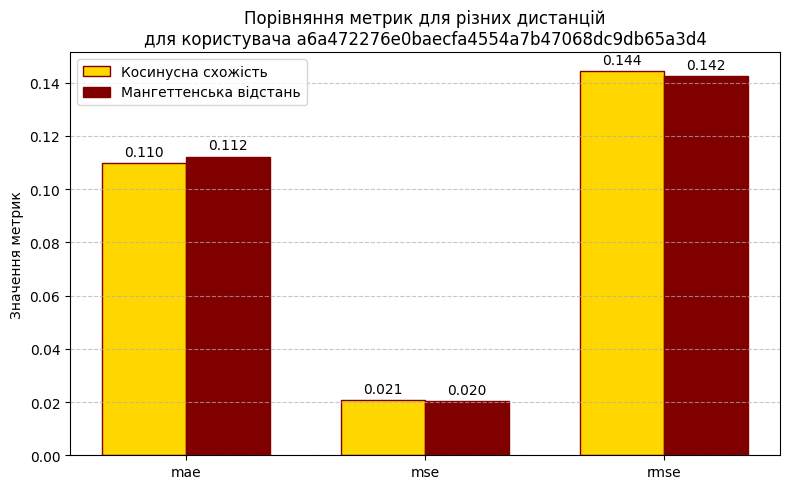

In [65]:
metrics = list(cosine.keys())
x = np.arange(len(metrics))

without_values = [cosine[metric] for metric in metrics]
with_values = [manhattan[metric] for metric in metrics]

width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, without_values, width, label='Косинусна схожість', color='gold', edgecolor='maroon')
bars2 = ax.bar(x + width/2, with_values, width, label='Мангеттенська відстань', color='maroon', edgecolor='maroon')

ax.set_ylabel('Значення метрик')
ax.set_title(f'Порівняння метрик для різних дистанцій\nдля користувача {ransom_user}')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Проведемо експеримент для всіх 1000 користувачів**

In [120]:
unique_users = df_profiles.index.values

In [121]:
recommendations = {}
for user_id in unique_users:
    user_cluster = df_users[df_users['user_id'] == user_id]['cluster_kmeans'].values[0]
    if user_id not in recommendations:
        recommendations[user_id] = {}
    recommendations[user_id] = {
            'cosine': get_features_of_recommended_tracks(get_user_to_user_recommendations(clusters_cosine[user_cluster], df_users, user_id, 20), df_features),
            'manhattan': get_features_of_recommended_tracks(get_user_to_user_recommendations(clusters_manhattan[user_cluster], df_users, user_id, 20), df_features),
        }

In [122]:
similarity = {}
for user_id in unique_users:
    user_profile = df_profiles[df_profiles.index == user_id]
    if user_id not in similarity:
        similarity[user_id] = {}
    similarity[user_id] = {
        'cosine': simmilarity(user_profile, recommendations[user_id]['cosine'], features),
        'manhattan': simmilarity(user_profile, recommendations[user_id]['manhattan'], features)
    }

In [123]:
def get_min_metric(error_measures):
    min_metrics = {}
    for metric in ['mae', 'mse', 'rmse']:
        best = min(error_measures.items(), key=lambda item: item[1][metric])
        min_metrics[metric] = best[0]
    return min_metrics

In [124]:
min_metrics = {}
for user in unique_users:
    if user not in min_metrics:
        min_metrics[user] = {}
    min_metrics[user] = get_min_metric(similarity[user])

In [125]:
min_metrics_df = pd.DataFrame.from_dict(min_metrics, orient='index')
min_metrics_df.sample()

mae        mse       rmse
2b7a0217bb0264df088342a10ceb737a46cce2fe  cosine  manhattan  manhattan

In [132]:
def plot_metrics(metric):
    plt.figure(figsize=(15, 5))
    plt.bar(x=min_metrics_df[metric].unique(), height=min_metrics_df[metric].value_counts(), color='maroon', edgecolor='black')
    plt.title(f'best {metric.upper()}')
    plt.xlabel('Metric Name')
    plt.ylabel('Number of results')
    plt.tight_layout()
    plt.show()

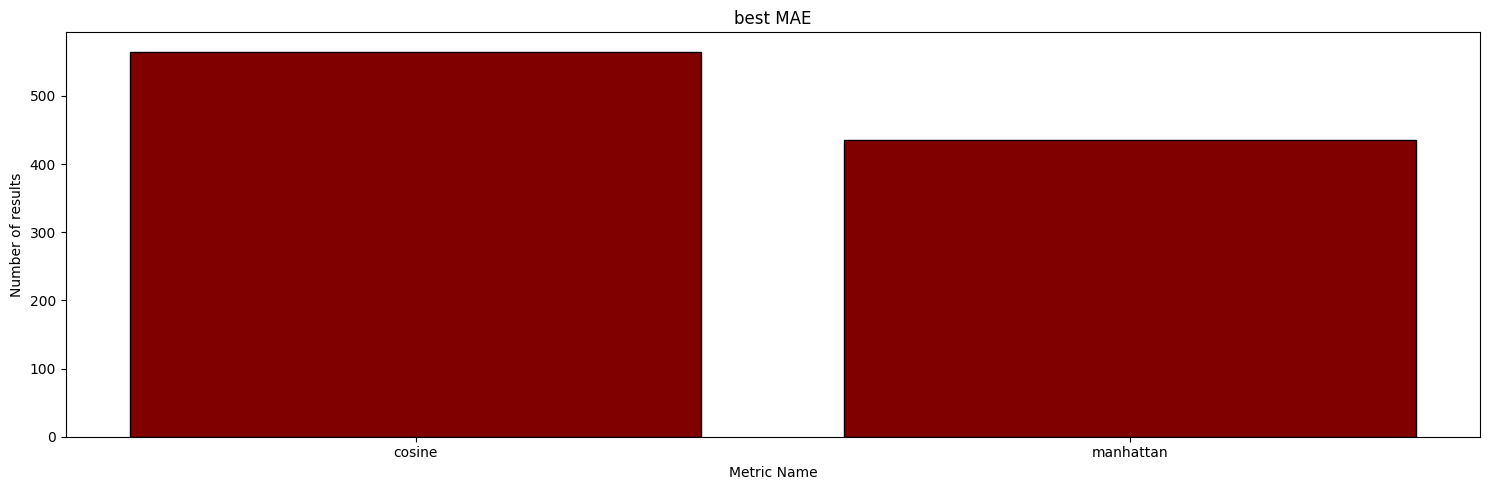

In [133]:
plot_metrics('mae')

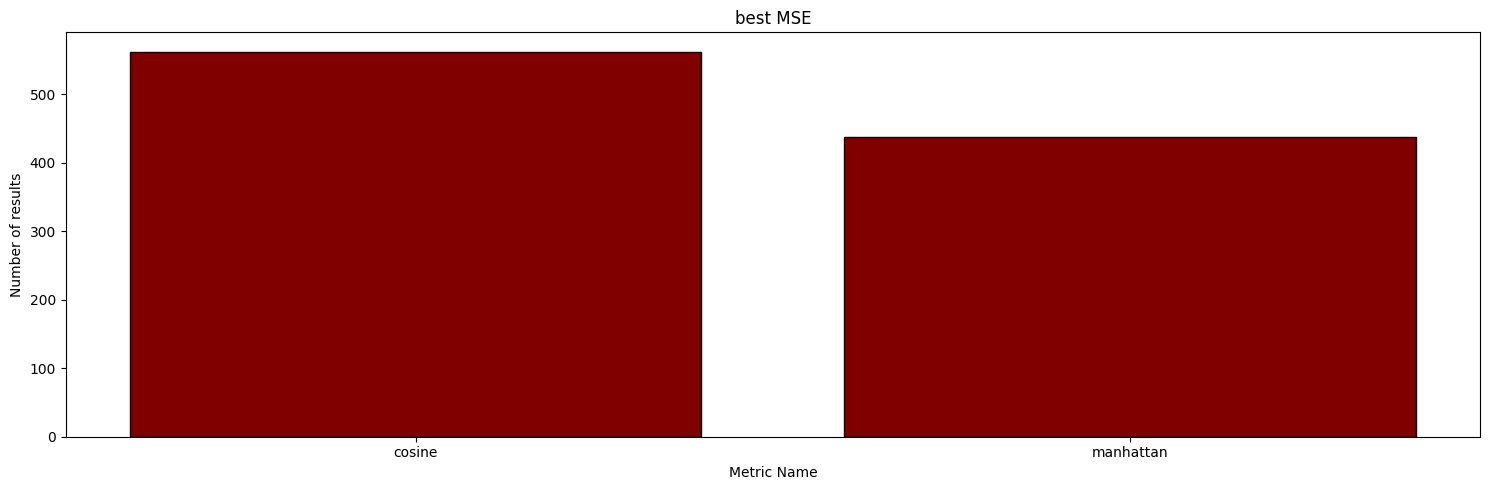

In [128]:
plot_metrics('mse')

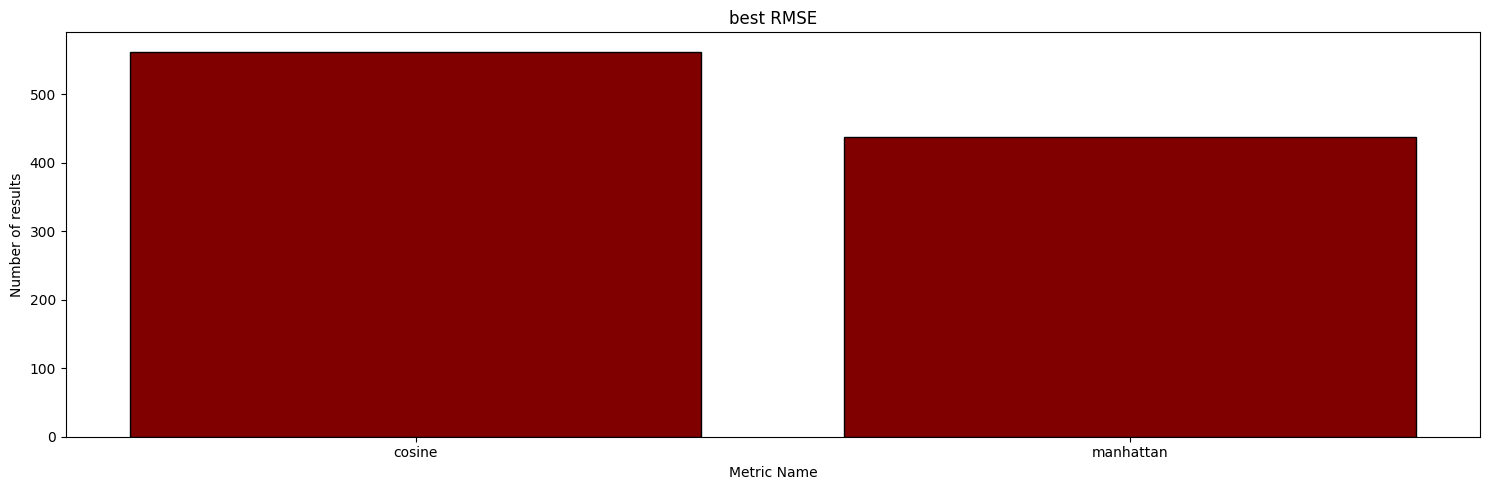

In [129]:
plot_metrics('rmse')